# 복습문제

In [2]:
import sklearn

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import pandas as pd
import numpy as np

items=['TV','냉장고',' 전자레인지','컴퓨터', '선풍기','선풍기','믹서','믹서'] 
item = np.array(items).reshape(-1, 1)


o_encoder = OneHotEncoder()
o_encoder.fit(item)
o_encoder.transform(item).toarray()

l_encoder = LabelEncoder()
l_encoder.fit(item)
l_encoder.transform(item)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 2, 0, 5, 4, 4, 3, 3])

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
 

iris_data = load_iris()

dt_clf = DecisionTreeClassifier(random_state=42)

 

data = iris_data.data ## X

label = iris_data.target ## y 

In [35]:
scores = cross_val_score(dt_clf, data, label, scoring = 'accuracy', cv = 3)
scores

array([0.98, 0.94, 0.96])

In [36]:
from sklearn.datasets import load_iris

iris = load_iris()
iris = iris['data']
iris_df = pd.DataFrame(iris) 
iris_df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [38]:
iris_df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
pd.DataFrame(scaler.transform(iris_df))

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [43]:
from sklearn.datasets import load_wine 

wine = load_wine() 
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [52]:
features = X = wine.data
label = y = wine.target

In [53]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

In [54]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, features, label, scoring = 'accuracy', cv = 4)
scores

array([0.82222222, 0.86666667, 0.93181818, 0.86363636])

In [64]:
pd.Series(label).value_counts()

1    71
0    59
2    48
dtype: int64

# 수업

## 타이타닉 생존자 예측

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
titanic = pd.read_csv('./data/titanic_train.csv')  ## ./ 하위  ,  ../ 상위
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [83]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [143]:
### 결측치 없애기
# titanic.Age의 결측치 평균으로 바꾸기
age_mean = int(titanic.Age.mean())

titanic.Age = titanic.Age.fillna(age_mean)
titanic.Cabin = titanic.Cabin.fillna('N')
titanic.Embarked = titanic.Embarked.fillna('N')

In [87]:
titanic.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [89]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [144]:
### Cabin을 첫 번째 문자로만 표현하기

titanic.Cabin = titanic.Cabin.str[:1]
titanic.Cabin

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [145]:
titanic.groupby(['Sex', 'Survived'])[['Survived']].count() 

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

In [146]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

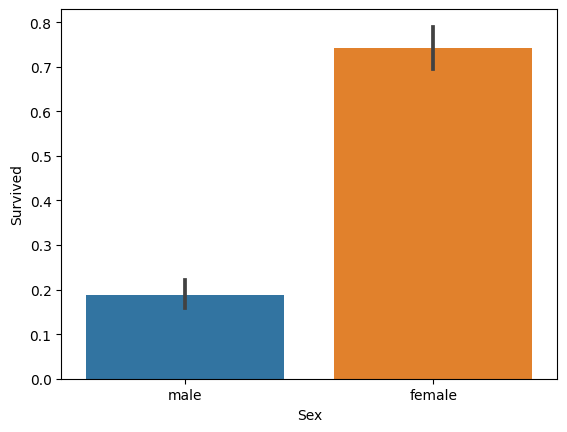

In [147]:
sns.barplot(data = titanic, x = 'Sex', y = 'Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

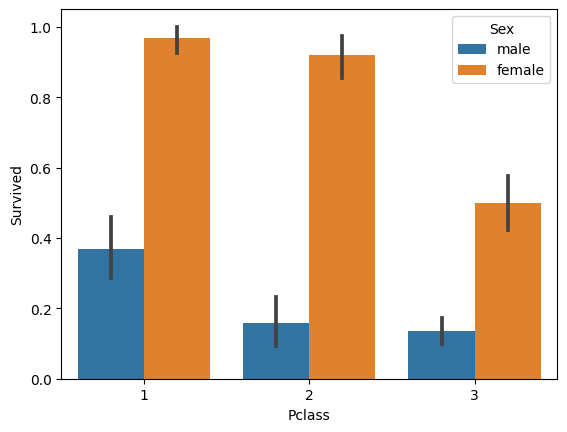

In [148]:
sns.barplot(data = titanic, x = 'Pclass', y = 'Survived', hue = 'Sex')

In [120]:
titanic.Age.min()

0.42

In [123]:
### age에 따라 구분하기
titanic.Age = pd.cut(titanic['Age'], bins = [0, 5, 12, 18, 25, 35, 60, 80] , 
       labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly'])

In [149]:
titanic['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [150]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
titanic['Cabin'] = encoder.fit_transform(titanic['Cabin']).tolist()
titanic['Sex'] = encoder.fit_transform(titanic['Sex']).tolist()
titanic['Embarked'] = encoder.fit_transform(titanic['Embarked']).tolist()
titanic[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3


In [151]:
## 'PassengerId', 'Name', 'Ticket' 칼럼 삭제

titanic.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [129]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,Student,1,0,7.2500,7,3
1,1,1,0,Adult,1,0,71.2833,2,0
2,1,3,0,Young Adult,0,0,7.9250,7,3
3,1,1,0,Young Adult,1,0,53.1000,2,3
4,0,3,1,Young Adult,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,Young Adult,0,0,13.0000,7,3
887,1,1,0,Student,0,0,30.0000,1,3
888,0,3,0,Young Adult,1,2,23.4500,7,3
889,1,1,1,Young Adult,0,0,30.0000,2,0


In [161]:
features = titanic.iloc[:, 1:]
labels = titanic.Survived
# labels = titanic.iloc[:, 0]

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .2, random_state = 11)

In [163]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [164]:
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr = LogisticRegression()

In [168]:
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
print('정확도: ', accuracy_score(y_test, pred).round(4))

정확도:  0.7989


In [169]:
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)
print('정확도: ', accuracy_score(y_test, pred).round(4))

정확도:  0.8547


In [170]:
lr.fit(X_train, y_train)

pred = lr.predict(X_test)
print('정확도: ', accuracy_score(y_test, pred).round(4))

정확도:  0.8492


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [183]:
X_train, X_test = features.values[train_index], features.values[test_index]
y_train, y_test = labels.values[train_index], labels.values[test_index]

In [193]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5)

scores = []
count = 0

for train_index, test_index in kfold.split(titanic):
    X_train, X_test = features.values[train_index], features.values[test_index]
    y_train, y_test = labels.values[train_index], labels.values[test_index]
    # X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    # y_train, y_test = labels[train_index], labels[test_index]
    
    dt_clf = DecisionTreeClassifier()
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    acc = accuracy_score(y_test, pred)
    
    scores.append(acc)
    
    count += 1
    
    print(f'{count} 개별정확도 : ', acc)

print('평균정확도 : ', np.sum(scores).round(4))

1 개별정확도 :  0.7541899441340782
2 개별정확도 :  0.7865168539325843
3 개별정확도 :  0.7921348314606742
4 개별정확도 :  0.7752808988764045
5 개별정확도 :  0.8146067415730337
평균정확도 :  3.9227


In [195]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, features, labels, scoring = 'accuracy', cv = 5)
scores

array([0.74860335, 0.78651685, 0.80898876, 0.80337079, 0.83146067])

## 평가

### 정확도(Accuracy)

- 정확도는 실제 데이터에서 예측 데이터가 얼마나 같은 지를 판단하는 지표

- 하지만, 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있음

- BaseEstimator 클래스를 상속받아 아무런 학습하지 않음
- fit 메서드는 아무것도 수행하지 않음
- predict 메서드는 sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는 매우 단순한 classifier

In [235]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 하지 않음
    def fit(self, X, y = None):
        pass
    
    # predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
                
        return pred

In [275]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna('N', inplace = True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df
    
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [276]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('./data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size= .2, random_state= 0)

In [277]:
myclf = MyDummyClassifier()

myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)

accuracy_score(y_test, mypredictions)

0.7877094972067039

- 정확도는 불균형한 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가 지표가 아님
- 예를 들어 0: 90개, 1: 10개 인 데이터에서 무조건 0이라고 예측하면 정확도 90%임

- MNIST 7이면 True, 나머지는 False로 변환해서 이진 분류 문제로 바꾸기
- 즉, 전체 데이터의 10%만 True, 90%는 False인 불균형한 데이터 세트로 변형

In [244]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [245]:
class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 변환
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)
    
digits = load_digits()

# digits 번호가 7이면 True이고 이를 astype(int)로 1로 변환, 7이 아니면 False이고 0으로 변환
y = (digits.target == 7).astype(int)

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)

In [246]:
y_test.shape

(450,)

In [247]:
pd.Series(y_test).value_counts()

0    405
1     45
dtype: int64

In [248]:
fakeclf = MyFakeClassifier()

fakeclf.fit(X_train, y_train)

fakepred = fakeclf.predict(X_test)

accuracy_score(y_test, fakepred)

0.9

- 7이면 True 아니면 False
- 7이 아닌 숫자가 90% --> 모두 0이라고 했지만 정확도 90%나옴

- 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용돼서는 안됨
- 여러 가지 분류 지표와 함께 적용하여 ML 모델 성능을 평가해야 함

### 오차 행렬

- 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는 지도 함께 보여주는 지표
- 이진 분류의 예측 오류가 얼마인지 + 어떠한 유형의 예측 오류가 발생하고 있는지

- 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이브 클래스 값이 어떠한 유형을 가지고 매핑되는 지를 나타냄

- True/False 는 예측갑과 실제값이 같은가/틀린가
- Negative/Positive는 예측 결과 값이 부정/긍정

In [252]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

- TN : 405 (예측 : 7 아님, 실제 : 7 아님)
- FN : 45  (예측 : 7 아님, 실제 : 7)
- FP : 0   (예측 : 7, 실제 : 7 아님)
- TP : 0   (예측 : 7, 실제 : 7)

<정확도( = 정분류율)>

- 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수
- (TN + TP) / (TN + FP + FN + TP)

- 일반적으로 이러한 불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 많은 데이터 중에서 중점적으로 찾아야 하는 매우 적은 수의 결괏값에 Positive을 설정해 1값을 부여하고, 그렇지 않은 경우는 Negative로 0을 부여하는 경우 많음
- Positive 데이터 건수가 적기 때문에 데이터에 기반한 ML 알고리즘은 Positive보다 Negative로 예측 정확도가 높아지는 경향 발생
- 즉, TN 매우 커지고 TP 매우 작아짐
- FN(Negative로 예측할 때 틀린 데이터 수)이 매우 작고, Positive로 예측하는 경우가 작기 때문에 FP 매우 작아짐

- 결과적으로 정확도 지표는 비대칭한 데이터 세트에서 Positive에 대한 예측 정확도를 파악하지 못한 채 Negative에 대한 예측 정확도만으로도 분류의 정확도가 매우 높게 나타나는 수치적 오류를 일으킴

### 정밀도와 재현율

- 정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춤

<정밀도/Precision>
- TP / (TP + FP)
- True Positive / Predicted Positive
- FP를 낮추는 데 초점을 맞춤

<재현율/Recall/민감도(Sensitivity)/TPR(True Positive Rate)>
- TP / (TP + FN)
- True Positive / Actually Positive
- FN을 낮추는 데 초점을 맞춤

- 특이도(Specificity) = True Negative / Actually Negative = TN / (FP + TN)
- True Negative Rate

- 1 - 특이도(Specificity) = False Positive Rate

- 재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
- 정밀도가 중요 지표인 경우는 실제 Negative 음성 데이터를 Positive로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우

In [278]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print(f'정확도 : {accuracy} \n정밀도 : {precision} \n재현율 : {recall}')

In [279]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna('N', inplace = True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df
    
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [281]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('./data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(['Survived'], axis = 1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=.2, random_state=11)

lr_clf = LogisticRegression(solver = 'liblinear')

lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)

get_clf_eval(y_test, pred)

# TN | FP
# -------
# FN | TP

오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659217877094972 
정밀도 : 0.8245614035087719 
재현율 : 0.7704918032786885


In [282]:
# 정확도
(108 + 47) / (108 + 10 + 14 + 47)

0.8659217877094972

In [283]:
# 정밀도
47 / (10 + 47)

0.8245614035087719

In [284]:
# 재현율
47 / (14 + 47)

0.7704918032786885

### 정밀도/재현율 트레이드오프

- 분류하려는 업무의 특성사 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값을 조정해 정밀도 또는 재현율을 수치를 높일 수 있음|

- 하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한 쪽을 강제로 높인다면 다른 하나의 수치는 떨어지기 쉬움
- 이를 정밀도/재현율의 트레이드오프(trade-off)라고 함

- 사이킷런의 분류 알고리즘은 예측 데이터가 특정 레이블에 속하는 지를 계산하기 위해 먼저 개별 레이블별로 결정 확률을 구함
- 예측 확률이 큰 레이블값으로 예측
- 예를 들어 0일 확률 10%, 1일 확률 90%면 1로 예측

In [291]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis = 1)
pred_proba_result[:10]

array([[0.44935227, 0.55064773, 1.        ],
       [0.86335512, 0.13664488, 0.        ],
       [0.86429645, 0.13570355, 0.        ],
       [0.84968519, 0.15031481, 0.        ],
       [0.82343411, 0.17656589, 0.        ],
       [0.84231224, 0.15768776, 0.        ],
       [0.8709549 , 0.1290451 , 0.        ],
       [0.27228603, 0.72771397, 1.        ],
       [0.78185129, 0.21814871, 0.        ],
       [0.33185993, 0.66814007, 1.        ]])

- [0일 확률, 1일 확률, 결과]
- 0일 확률이 높으면 0/ 1일 확률이 높으면 1로 결과 나옴

- 사이킷런은 분류 결정 임계값을 조절해 정밀도와 재현율의 성능 수치를 상호 보완적으로 조정할 수 있음

In [292]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임계값
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659217877094972 
정밀도 : 0.8245614035087719 
재현율 : 0.7704918032786885


In [293]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도 : 0.8212290502793296 
정밀도 : 0.704225352112676 
재현율 : 0.819672131147541


- 임곗값을 낮추니 재현율이 올라가고 정밀도 떨어짐
- 분류 결정 임계값은 Positive 예측값을 결정하는 확률의 기준임
- Positive 예측을 너그럽게 하기 때문에 임계값을 낮출수록 True 값이 많아짐

- Positive 예측값이 많아지면 상대적으로 재현율 값이 높아짐
- 양성 예측을 많이 하다보니 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어들기 때문임

- 임곗값이 0.5에서 0.4로 낮아지면서
- TP가 47에서 50으로 늘었고
- FN이 14에서 11로 줄어듦
- 재현율이 0.770에서 0.820으로 좋아짐
- 정밀도는 0.825에서 0.704로 나빠짐
- 정확도도 0.866에서 0.821로 나빠짐

In [296]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.50, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list객체 내의 값을 차례로 iteration 하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값:  0.4
오차 행렬
[[97 21]
 [11 50]]
정확도 : 0.8212290502793296 
정밀도 : 0.704225352112676 
재현율 : 0.819672131147541
임곗값:  0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도 : 0.8547486033519553 
정밀도 : 0.7868852459016393 
재현율 : 0.7868852459016393
임곗값:  0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659217877094972 
정밀도 : 0.8245614035087719 
재현율 : 0.7704918032786885
임곗값:  0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도 : 0.8715083798882681 
정밀도 : 0.8653846153846154 
재현율 : 0.7377049180327869
임곗값:  0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도 : 0.8770949720670391 
정밀도 : 0.8979591836734694 
재현율 : 0.7213114754098361


- 임곗값이 0.45일 때 디폴트 0.5인 경우와 비교해서 정확도는 동일하고 정밀도는 약간 떨어졌으며 재현율이 오름
- 재현율을 향상시키면서 다른 수치를 어느 정도 감소한느 희생을 해야 한다면 임곗값 0.45가 가장 적당

In [298]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 shape: ', thresholds.shape)

# 반환된 임곗값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임곗값 배열의 index 10개: ', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도 : ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율 : ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 shape:  (165,)
샘플 추출을 위한 임곗값 배열의 index 10개:  [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곗값:  [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
샘플 임계값별 정밀도 :  [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
샘플 임계값별 재현율 :  [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


- 추출된 임계값 샘플 10개에 해당하는 정밀도 값과 재현율 값을 살펴보면 임계값이 증가할수록 정밀도 값은 동시에 높아지거나 재현율 값은 낮아짐

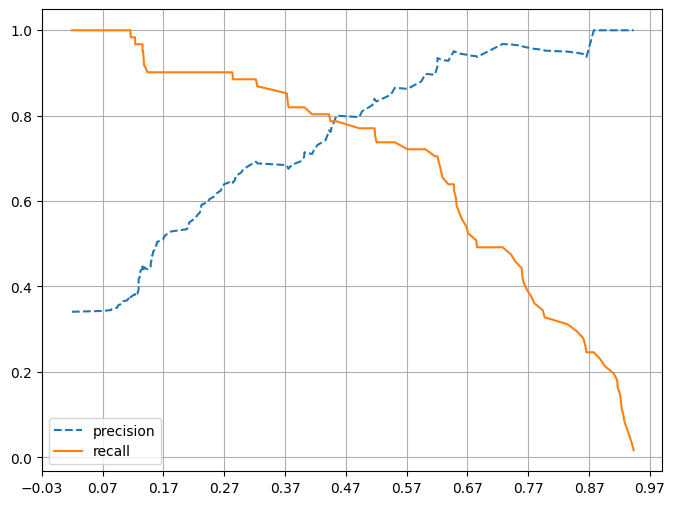

In [299]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold 값으로 Y축은 정밀도, 재현율 값으로 각각 plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    # threshold 값 X축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.legend();plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

- 정밀도는 점선 / 재현율은 실선
- 임계값이 낮을수록 많은 수의 양성 예측으로 인해 재현율의 값이 극도로 높아지고 정밀도 값이 극도로 낮아짐

### 정밀도와 재현율의 맹점

- Positive 예측의 임곗값을 변경함에 따라 정밀도와 재현율의 수치가 변경됨
- 이러한 변경은 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용돼야 함
- 단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용되어서는 안됨

<정밀도가 100%가 되는 방법>
- 확실한 기분이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative으로 예측

<재현율이 100%가 되는 방법>
- 모든 환자를 Positive로 예측

### F1 스코어

- 정밀도와 재현율을 결합한 지표
- 높으면 무조건 좋음
- 공식 166p 참고

In [306]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
f1

0.7966101694915254

In [308]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print('오차 행렬')
    print(confusion)
    print(f'정확도 : {accuracy} \n정밀도 : {precision} \n재현율 : {recall} \nF1 : {f1}')
    
threshods = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값:  0.019749876657815333
오차 행렬
[[  1 117]
 [  0  61]]
정확도 : 0.3463687150837989 
정밀도 : 0.34269662921348315 
재현율 : 1.0 
F1 : 0.5104602510460251
임곗값:  0.0695641391560792
오차 행렬
[[  2 116]
 [  0  61]]
정확도 : 0.35195530726256985 
정밀도 : 0.3446327683615819 
재현율 : 1.0 
F1 : 0.5126050420168067
임곗값:  0.0840280839422546
오차 행렬
[[  3 115]
 [  0  61]]
정확도 : 0.3575418994413408 
정밀도 : 0.3465909090909091 
재현율 : 1.0 
F1 : 0.5147679324894515
임곗값:  0.08474206831469354
오차 행렬
[[  4 114]
 [  0  61]]
정확도 : 0.36312849162011174 
정밀도 : 0.3485714285714286 
재현율 : 1.0 
F1 : 0.516949152542373
임곗값:  0.08920160582310264
오차 행렬
[[  5 113]
 [  0  61]]
정확도 : 0.3687150837988827 
정밀도 : 0.3505747126436782 
재현율 : 1.0 
F1 : 0.5191489361702127
임곗값:  0.09445723694725262
오차 행렬
[[  6 112]
 [  0  61]]
정확도 : 0.3743016759776536 
정밀도 : 0.35260115606936415 
재현율 : 1.0 
F1 : 0.5213675213675214
임곗값:  0.09465144047902171
오차 행렬
[[  7 111]
 [  0  61]]
정확도 : 0.37988826815642457 
정밀도 : 0.3546511627906977 
재현율 : 1.0 
F1 : 0.5236051502145923
임곗값

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- F1 score는 임계값이 0.6일 때 가장 좋음

### ROC 곡선과 AUC

- ROC 곡선 = 수신자 판단 곡선
- ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate/재현율/민감도)이 어떻게 변하는지를 나타내는 곡선임

- 민감도(TPR)는 실제값 Positive가 정확히 예측돼야 하는 수준을 나타냄(질병이 있는 사람은 질병이 있는 것으로 양성 판정)
- 특이성(TNR)은 실제값 Negative가 정확히 예측돼야 하는 수준을 나타냄(질병이 없는 건강한 사람은 질병이 없는 것으로 판정)

FPR = FP / (FP + TN) = 1 - TNR = 1 - 특이성

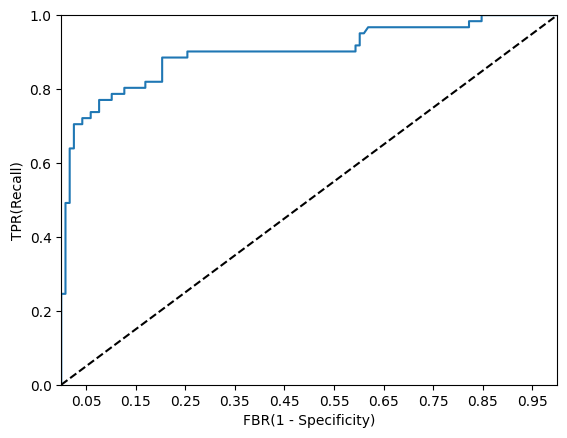

In [312]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    #ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label = 'ROC')
    
    #가운데 대각선 직선을 그림
    plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
    
    # FBR X 축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FBR(1 - Specificity)');plt.ylabel('TPR(Recall)')
    plt.legend
    
roc_curve_plot(y_test, pred_proba[:, 1])

- 가운데 직선은 ROC 곡선의 최저 값
- 왼쪽 하단과 오른쪽 상단을 대각선으로 이은 직선은 동전을 무작위로 던져 앞/뒤를 맞추는 랜덤 수준의 이진 분류의 ROC 직선임
- ROC 곡선이 가운데 직선에 가까울수록 성능이 떨어지는 것이며, 멀어질수록 성능이 뛰어난 것임

- 분류 결정 임계값을 변경해 FPR을 0부터 1까지 변경할 수 있음
- FPR을 0으로 만드려면 임곗값을 1로 지정하면 됨
- 임곗값을 1로 지정하면 Positive 예측 기준이 매우 높기 때문에 분류기가 임곗값보다 높은 확률을 가진 데이터를 Positive로 예측할 수 없음
- FPR = FP / (FP + TN)
- 아예 Positive로 예측하지 않기 때문에 FP 값이 0이 되므로 FPR은 0이 됨

- 반대로 FPR를 1로 만드려면 TN을 0으로 만들면 됨
- TN을 0으로 만드려면 분류 결정 임곗값으 0으로 지정하면 됨

- 임곗값을 1부터 0까지 변화시키면서 FPR을 구하고 이 FPR 값의 변화에 따른 TPR 값을 구하는 것이 ROC 곡선임

- 일반적으로 ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는 데 이용하면 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정됨
- AUC(Area Under Curve)값은 ROC 곡선 밑의 면적을 구한 것으로 일반적으로 1에 가까울수록 좋은 수치임

In [316]:
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    print('오차 행렬')
    print(confusion)
    print(f'정확도 : {accuracy} \n정밀도 : {precision} \n재현율 : {recall} \nF1 : {f1} \nAUC : {roc_auc}')
    

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값:  0.019749876657815333
오차 행렬
[[  1 117]
 [  0  61]]
정확도 : 0.3463687150837989 
정밀도 : 0.34269662921348315 
재현율 : 1.0 
F1 : 0.5104602510460251 
AUC : 0.5042372881355932
임곗값:  0.0695641391560792
오차 행렬
[[  2 116]
 [  0  61]]
정확도 : 0.35195530726256985 
정밀도 : 0.3446327683615819 
재현율 : 1.0 
F1 : 0.5126050420168067 
AUC : 0.5084745762711864
임곗값:  0.0840280839422546
오차 행렬
[[  3 115]
 [  0  61]]
정확도 : 0.3575418994413408 
정밀도 : 0.3465909090909091 
재현율 : 1.0 
F1 : 0.5147679324894515 
AUC : 0.5127118644067796
임곗값:  0.08474206831469354
오차 행렬
[[  4 114]
 [  0  61]]
정확도 : 0.36312849162011174 
정밀도 : 0.3485714285714286 
재현율 : 1.0 
F1 : 0.516949152542373 
AUC : 0.5169491525423728
임곗값:  0.08920160582310264
오차 행렬
[[  5 113]
 [  0  61]]
정확도 : 0.3687150837988827 
정밀도 : 0.3505747126436782 
재현율 : 1.0 
F1 : 0.5191489361702127 
AUC : 0.521186440677966
임곗값:  0.09445723694725262
오차 행렬
[[  6 112]
 [  0  61]]
정확도 : 0.3743016759776536 
정밀도 : 0.35260115606936415 
재현율 : 1.0 
F1 : 0.5213675213675214 
AUC : 0.52542372

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
